In [1]:
import cv2
import torch
import torch.nn as nn
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from torchvision import datasets, transforms, models
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sys

Using TensorFlow backend.
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
from torch.utils.data import DataLoader, TensorDataset


from time import time
from sklearn.metrics import classification_report

# Preprocess the data

In [3]:
plt.figure()
plt.imshow(old_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

NameError: name 'old_train' is not defined

<Figure size 432x288 with 0 Axes>

In [3]:
df = pd.read_csv('/home/ubuntu/hi-env/image-processing-labs/end-project/nyamka-and-idree/trainset.csv')
print(df.shape)
df.head()

(460, 785)


,labels,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,122,122,123,124,83,60,80,102,111,...,37,26,21,21,32,44,81,112,112,110
1,0,108,106,110,110,66,28,36,64,103,...,128,122,114,113,99,86,62,92,98,99
2,0,143,141,140,135,139,15,21,23,19,...,125,112,94,88,74,77,102,26,34,115
3,0,40,39,40,60,149,174,179,181,182,...,18,19,28,72,111,127,132,77,208,231
4,0,74,68,56,48,42,99,162,169,170,...,15,20,41,76,86,122,124,101,131,213


In [4]:
y_train = df['labels']
df_train = df.drop(columns=['labels'])
y_train

0      0
1      0
2      0
3      0
4      0
      ..
455    1
456    1
457    1
458    1
459    1
Name: labels, Length: 460, dtype: int64

In [5]:
df_train.shape

(460, 784)

In [6]:
X = torch.tensor(df_train.values, dtype=torch.float16).view(df_train.shape[0],1,28,28) # this "1" is # of channels
Y = torch.tensor(y_train)

label:  tensor(0)


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


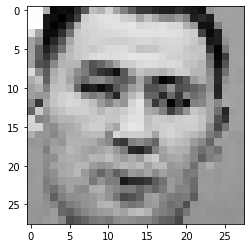

In [7]:
# Жишээ дата
data_id = 5
size = 28
print('label: ', Y[data_id])
plt.imshow(torch.tensor(X[data_id].view(size,size), dtype=torch.int16), cmap='Greys_r') # 
plt.show()

In [8]:
n_test = 100
# train test split
train_x = X[:-n_test, :]
test_x = X[-n_test:, :]


train_y = Y[:-n_test]
test_y = Y[-n_test:]

print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

torch.Size([360, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([360])
torch.Size([100])


# Build the model

In [33]:
# define the keras model
# model = Sequential()
# model.add(Dense(12, input_dim=len(y_train.unique()), activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [34]:
# compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# fit the keras model on the dataset
# model.fit(train_x, train_y, epochs=150, batch_size=256)

In [36]:
# evaluate the keras model
# _, accuracy = model.evaluate(train_x, train_y)
# print('Accuracy: %.2f' % (accuracy*100))

In [9]:

model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1, padding=0),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(), # activation
    
    nn.Conv2d(in_channels=3, out_channels=5, kernel_size=4, stride=1, padding=0),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(), # activation
    
    nn.Flatten(),
    nn.Linear(80, len(y_train.unique())), # activation
    nn.Softmax()
)

print(model)

output = model(test_x.float()) # checking whether the dimension is correct or not.
output.shape

Sequential(
  (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(3, 5, kernel_size=(4, 4), stride=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Flatten()
  (7): Linear(in_features=80, out_features=2, bias=True)
  (8): Softmax(dim=None)
)


/home/ubuntu/.local/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


torch.Size([100, 2])

In [10]:
# hyperparameters
lr=1e-3
batch_size = 16 # train_x.size()[0]//2
n_epoch = 30

In [11]:
train = TensorDataset(train_x, train_y)
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)

# Mean Squared Error -> Loss ------------- < Cross Entropy Loss
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # Adam, RMSProp

In [17]:
train_history = []
val_history = []
print('training...')
for epoch in range(1, n_epoch + 1):
    st = time()
    train_loss = 0
    for xb, yb in train_loader: # getting data by batch size
        
        optimizer.zero_grad()
        output = model(xb.float()) # outputs 10
        loss = criterian(output, yb)
        
        loss.backward()
        optimizer.step()
        # print(loss.item())
        train_loss += loss.item() * yb.shape[0]
        
    train_loss = train_loss/train_x.size()[0]
    train_history.append(train_loss)
    
    
    pred = model(test_x.float())
    val_loss = criterian(pred, test_y)
    val_history.append(val_loss.item())
    
    print(f"e {epoch}: {train_loss}, {val_loss.item()}, {time() - st} sec")

training...
e 1: 0.31740433441268073, 0.42840489745140076, 0.11254572868347168 sec
e 2: 0.3174814217620426, 0.4387415647506714, 0.09347653388977051 sec
e 3: 0.3175519890255398, 0.41347840428352356, 0.09021806716918945 sec
e 4: 0.31774313383632236, 0.47387078404426575, 0.07228660583496094 sec
e 5: 0.31759769121805825, 0.4365290701389313, 0.0848703384399414 sec
e 6: 0.31729387243588764, 0.43027129769325256, 0.071258544921875 sec
e 7: 0.317324380742179, 0.44876763224601746, 0.0707082748413086 sec
e 8: 0.3171387473742167, 0.4433465898036957, 0.06941795349121094 sec
e 9: 0.3172204209698571, 0.4296766519546509, 0.07407116889953613 sec
e 10: 0.31718041367001004, 0.4187553822994232, 0.06435012817382812 sec
e 11: 0.31713717579841616, 0.44252490997314453, 0.06521439552307129 sec
e 12: 0.31724322769376967, 0.4324643611907959, 0.08159780502319336 sec
e 13: 0.31716472771432663, 0.4135885536670685, 0.06705474853515625 sec
e 14: 0.31787674824396767, 0.44518718123435974, 0.08875179290771484 sec
e 15: 

In [18]:
pred = model(test_x.float()).clone().detach()

pred_ids = pred.argmax(1)

print(classification_report(test_y, pred_ids))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93       100

    accuracy                           0.87       100
   macro avg       0.50      0.43      0.47       100
weighted avg       1.00      0.87      0.93       100



predicted:  1


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


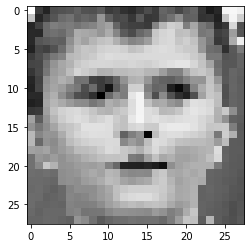

predicted:  1


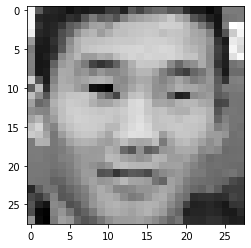

predicted:  0


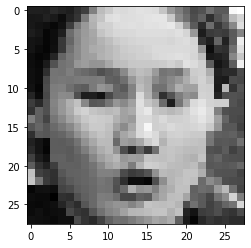

predicted:  1


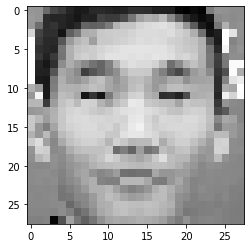

predicted:  0


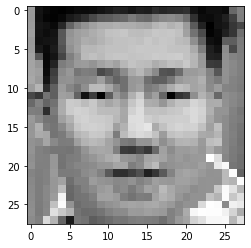

predicted:  1


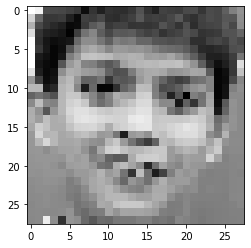

predicted:  1


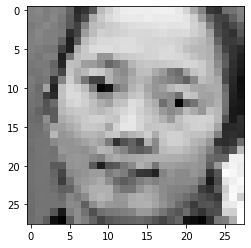

predicted:  1


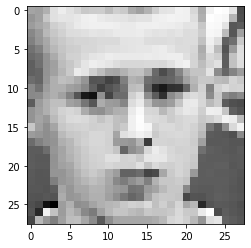

predicted:  0


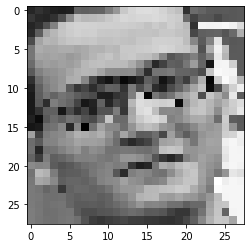

predicted:  1


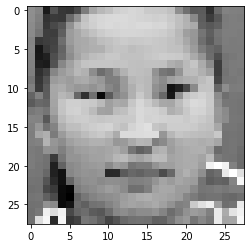

predicted:  1


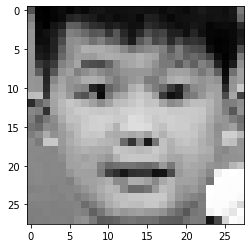

predicted:  0


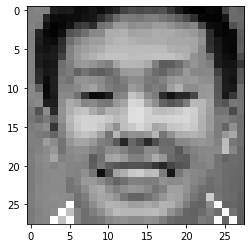

predicted:  1


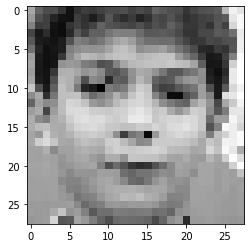

predicted:  1


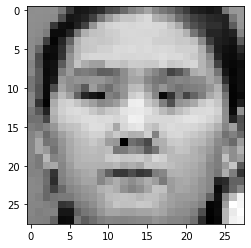

predicted:  1


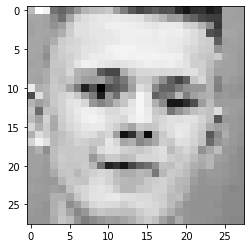

predicted:  1


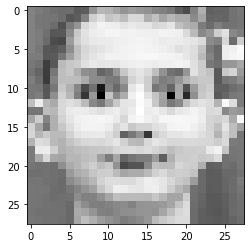

predicted:  1


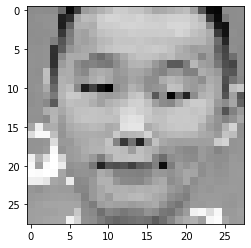

predicted:  1


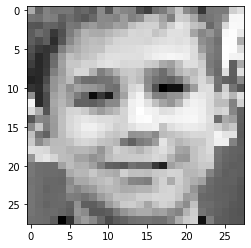

predicted:  1


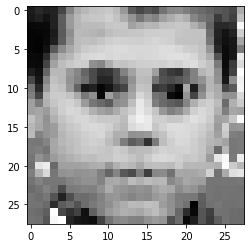

predicted:  1


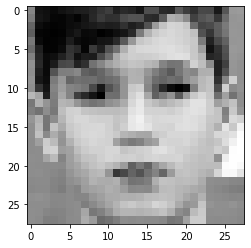

predicted:  1


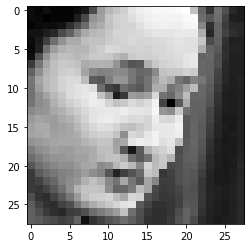

predicted:  1


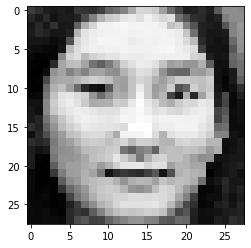

predicted:  1


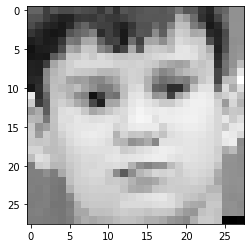

predicted:  1


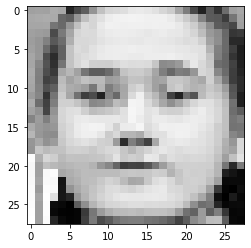

predicted:  0


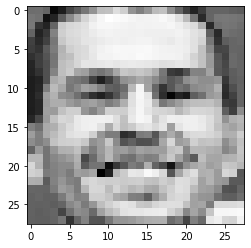

predicted:  1


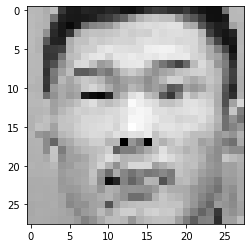

predicted:  1


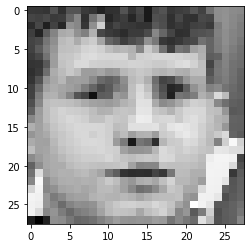

predicted:  1


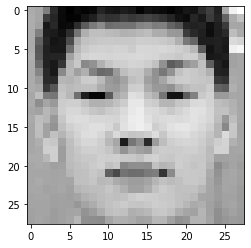

predicted:  1


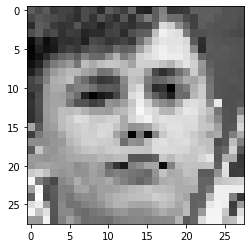

predicted:  1


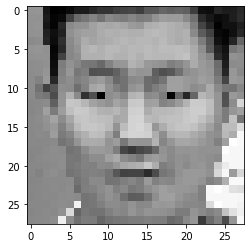

<Figure size 432x288 with 0 Axes>

In [19]:
# Жишээ дата
data_id = 10

for data_id in range(30):
    print("predicted: ", pred_ids[data_id].item())
    plt.imshow(torch.tensor(test_x[data_id].view(size,size), dtype=torch.int16), cmap='Greys_r')
    plt.show()
    plt.clf()

In [21]:

torch.save(model.state_dict(), 'cnn_model.pt')
print("model saved!")

model saved!
